In [1]:
import xarray as xr
import pandas as pd
from os import walk

In [2]:
dir_path = r"C:\Users\Brian\Documents\GitHub\Weather data\Data"


In [3]:
res = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    res.extend(file_names)
    # don't look inside any subdirectory
    break

In [4]:
variables = ["fg", "hu", "pp", "rr", "tg", "tn", "tx"]
i = 0
for files in res:
    data_path = dir_path + "\\" + files
    print(data_path)

    data = xr.open_dataset(data_path)
    print(data[variables[i]])
    i += 1

C:\Users\Brian\Documents\GitHub\Weather data\Data\fg_ens_mean_0.1deg_reg_v27.0e.nc
<xarray.DataArray 'fg' (time: 15706, latitude: 350, longitude: 511)>
[2809018100 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -11.05 -10.95 -10.85 ... 39.75 39.85 39.95
  * latitude   (latitude) float64 35.05 35.15 35.25 35.35 ... 69.75 69.85 69.95
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed
    units:          m/s
C:\Users\Brian\Documents\GitHub\Weather data\Data\hu_ens_mean_0.1deg_reg_v27.0e.nc
<xarray.DataArray 'hu' (time: 26663, latitude: 465, longitude: 705)>
[8740797975 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2022-12-31
Attributes:
    

In [5]:
#get the mean temp data converted to csv
#res[4] is mean temps ("tg")
data_path = dir_path + "\\" + res[4]
sourcedata=xr.open_dataset(data_path)

In [262]:
temp_lst = [1,2,3,4,5,6]
ii = 1
for file in temp_lst:
    data_path = dir_path + "\\" + res[file]
    sourcedata=xr.open_dataset(data_path)
    temp_data = sourcedata[variables[ii]]
    #Time slice, lat, long
    temp_data = temp_data[20000:,183,303]
 
    if ii == 1:
        weather_df = temp_data.to_dataframe()
    else:
        data_as_df = temp_data.to_dataframe()
        print(data_as_df)
        print(weather_df)
        if len(weather_df) ==len(data_as_df):
            weather_df[variables[ii]] = data_as_df[variables[ii]]

    ii +=1
    print(weather_df.head())


            longitude   latitude         hu
time                                       
2004-10-04    5.34986  43.349861  73.090004
2004-10-05    5.34986  43.349861  56.055000
2004-10-06    5.34986  43.349861  69.919998
2004-10-07    5.34986  43.349861  73.470001
2004-10-08    5.34986  43.349861  71.840004
             latitude  longitude           pp
time                                         
2004-10-04  43.349861    5.34986  1019.900024
2004-10-05  43.349861    5.34986  1018.100037
2004-10-06  43.349861    5.34986  1016.400024
2004-10-07  43.349861    5.34986  1014.900024
2004-10-08  43.349861    5.34986  1012.000000
...               ...        ...          ...
2022-12-27  43.349861    5.34986  1028.300049
2022-12-28  43.349861    5.34986  1025.800049
2022-12-29  43.349861    5.34986  1020.400024
2022-12-30  43.349861    5.34986  1020.400024
2022-12-31  43.349861    5.34986  1025.200073

[6663 rows x 3 columns]
            longitude   latitude         hu
time                     

<Axes: xlabel='time'>

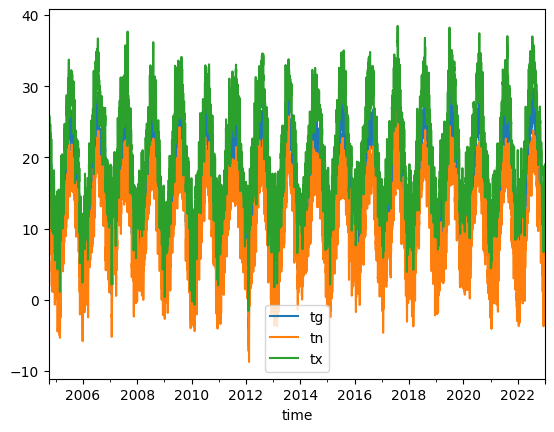

In [263]:
weather_df[["tg", "tn", "tx"]].plot()

In [264]:
weather_df["target"] = weather_df.shift(-1)["tg"]

In [265]:
weather_df = weather_df.iloc[:-1,:].copy()

In [266]:
weather_df

,longitude,latitude,hu,pp,rr,tg,tn,tx,target
time,,,,,,,,,
2004-10-04,5.34986,43.349861,73.090004,1019.900024,0.0,19.969999,15.110000,24.480000,20.650000
2004-10-05,5.34986,43.349861,56.055000,1018.100037,0.0,20.650000,15.339999,26.000000,21.559999
2004-10-06,5.34986,43.349861,69.919998,1016.400024,0.0,21.559999,18.539999,24.340000,20.459999
2004-10-07,5.34986,43.349861,73.470001,1014.900024,0.0,20.459999,16.000000,24.740000,21.160000
2004-10-08,5.34986,43.349861,71.840004,1012.000000,0.0,21.160000,16.709999,25.799999,20.709999
...,...,...,...,...,...,...,...,...,...
2022-12-26,5.34986,43.349861,89.711113,1024.800049,0.0,12.790000,8.650000,17.379999,10.460000
2022-12-27,5.34986,43.349861,82.410004,1028.300049,0.0,10.460000,5.370000,15.639999,9.190000
2022-12-28,5.34986,43.349861,89.044998,1025.800049,0.0,9.190000,2.750000,15.700000,13.400000


In [267]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)

In [268]:
predictors = ["hu", "pp", "rr","tg","tn","tx"]

In [269]:
train = weather_df.loc[:"2021-12-31"]
train = train.dropna()

In [270]:
test = weather_df["2022-01-01":]
test = test.dropna()

In [271]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [272]:
predictions = reg.predict(test[predictors])

In [273]:
from sklearn.metrics import mean_absolute_error

In [274]:
mean_absolute_error(test["target"],predictions)

1.2475365

In [275]:
combination = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)

In [276]:
combination.columns = ["target","predictions"]

In [277]:
combination

,target,predictions
time,,
2022-01-01,10.380000,9.920671
2022-01-02,10.580000,9.677679
2022-01-03,10.639999,11.025152
2022-01-04,9.200000,11.037165
2022-01-05,5.840000,8.826929
...,...,...
2022-12-26,10.460000,13.334915
2022-12-27,9.190000,11.231853
2022-12-28,13.400000,10.596495


In [278]:
monthly_average = combination["predictions"].groupby(combination.index.month)

<Axes: xlabel='time'>

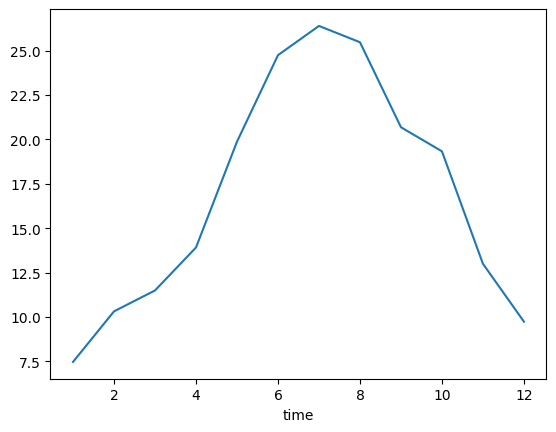

In [279]:
monthly_average.mean().plot()

In [280]:
monthly_average.mean()

time
1      7.470462
2     10.318534
3     11.495220
4     13.915524
5     19.874413
6     24.747257
7     26.394533
8     25.475691
9     20.689205
10    19.331749
11    12.998263
12     9.738303
Name: predictions, dtype: float32

<Axes: xlabel='time'>

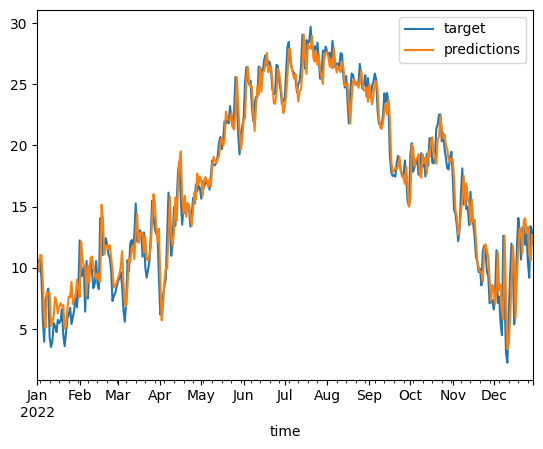

In [281]:
combination.plot()

In [282]:
reg.coef_

array([ 0.0150296 ,  0.00825566, -0.00118029,  0.36012504,  0.10898991,
        0.47450933], dtype=float32)

In [ ]:
print(temp_data[1,1,:])